<a href="https://colab.research.google.com/github/aditimahabole/chunnubola/blob/master/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf 
print(tf.__version__)

2.12.0


# **Import Basic Libraries**

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# **Read Dataset**

In [36]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()
# this is a binary classification
# we are predicting we customers are leaving bank or not

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Divide into dependent and Independent Features**

In [37]:
X =dataset.iloc[:,3:13]
# iloc = index location
# all rows , col 3 to 12th
y = dataset.iloc[:,13]
print(X.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  


# **Feature Engineering**

In [38]:
# second param will give only 2 cols
#  we are converting the categories into columns
# suppose we have 3 categoreis like fance germany spain
# so columns will be made and 1 , 0 is put if value is present
geography  = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

# **Concatinate variables with dataframe**

In [39]:
X = X.drop(['Geography','Gender'],axis = 1)
# dropping these 2 cols and axis 1 ensures to drop the col and not rows


In [40]:
X = pd.concat([X,geography,gender], axis = 1)

# **Splitting dataset into Training and Testing**

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

# **Feature Scaling**

In [42]:
# feature scaling is req in algos that are distance related , it is also req in gradient descent problems
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Scaling typically means adjusting the values so they fall within a specific range or have a particular distribution
# The purpose of scaling is to make the data more comparable and easier to work with during the training process.

In [43]:
# The reason we only apply fit_transform() to the training dataset and not the test dataset is to prevent information leakage.
# If you were to fit and transform both the training and test datasets together, the scaler would learn from information 
# in the test data that should ideally be unknown during the training phase. 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [44]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [45]:
X_train.shape

(8000, 11)

# **PART 2 Create ANN**

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [47]:
#Initialize ANN layer
classifier = Sequential()

In [48]:
#Adding Input Layer
classifier.add(Dense(units = 11,activation = 'relu'))

In [49]:
#Adding FIrst HIdden Layer
classifier.add(Dense(units = 7,activation = 'relu'))

In [50]:
#Adding Second HIdden Layer
classifier.add(Dense(units = 6,activation = 'relu'))

In [51]:
#Adding Output Layer
classifier.add(Dense(1,activation = 'sigmoid'))

# **Train Neural Network**

In [52]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [53]:
classifier.compile(optimizer = opt ,loss = 'binary_crossentropy', metrics = ['accuracy'])
#Adam uses learning rate of 0.1 as default optimizer = 'adam'

In [54]:
#early stopping : this is used when accuracy is coming same almost so stop training
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = "val_lbss",
    min_delta=0.0001,
    patience = 20,
    verbose=1,
    mode="auto",
    baseline = None,
    restore_best_weights=False,

)

In [56]:
model_history = classifier.fit(X_train,y_train,validation_split = 0.33,batch_size = 10,epochs = 100,callbacks = early_stopping)

Epoch 1/100
524/536 [============================>.] - ETA: 0s - loss: 0.3264 - accuracy: 0.8632

536/536 [==============================] - 2s 4ms/step - loss: 0.3266 - accuracy: 0.8630 - val_loss: 0.3745 - val_accuracy: 0.8489
Epoch 2/100
532/536 [============================>.] - ETA: 0s - loss: 0.3276 - accuracy: 0.8618

536/536 [==============================] - 2s 4ms/step - loss: 0.3275 - accuracy: 0.8621 - val_loss: 0.3598 - val_accuracy: 0.8576
Epoch 3/100
534/536 [============================>.] - ETA: 0s - loss: 0.3235 - accuracy: 0.8669

536/536 [==============================] - 3s 5ms/step - loss: 0.3244 - accuracy: 0.8666 - val_loss: 0.3900 - val_accuracy: 0.8395
Epoch 4/100
528/536 [============================>.] - ETA: 0s - loss: 0.3241 - accuracy: 0.8642

536/536 [==============================] - 3s 5ms/step - loss: 0.3228 - accuracy: 0.8643 - val_loss: 0.3646 - val_accuracy: 0.8527
Epoch 5/100
532/536 [============================>.] - ETA: 0s - loss: 0.3215 - accuracy: 0.8633

536/536 [==============================] - 2s 4ms/step - loss: 0.3215 - accuracy: 0.8632 - val_loss: 0.3633 - val_accuracy: 0.8523
Epoch 6/100
531/536 [============================>.] - ETA: 0s - loss: 0.3215 - accuracy: 0.8642

536/536 [==============================] - 2s 4ms/step - loss: 0.3221 - accuracy: 0.8640 - val_loss: 0.3594 - val_accuracy: 0.8523
Epoch 7/100
526/536 [============================>.] - ETA: 0s - loss: 0.3186 - accuracy: 0.8677

536/536 [==============================] - 2s 4ms/step - loss: 0.3214 - accuracy: 0.8662 - val_loss: 0.3570 - val_accuracy: 0.8550
Epoch 8/100
529/536 [============================>.] - ETA: 0s - loss: 0.3175 - accuracy: 0.8667

536/536 [==============================] - 3s 6ms/step - loss: 0.3194 - accuracy: 0.8664 - val_loss: 0.3660 - val_accuracy: 0.8550
Epoch 9/100
522/536 [============================>.] - ETA: 0s - loss: 0.3213 - accuracy: 0.8640

536/536 [==============================] - 3s 5ms/step - loss: 0.3218 - accuracy: 0.8638 - val_loss: 0.3647 - val_accuracy: 0.8508
Epoch 10/100
534/536 [============================>.] - ETA: 0s - loss: 0.3229 - accuracy: 0.8637

536/536 [==============================] - 2s 5ms/step - loss: 0.3228 - accuracy: 0.8638 - val_loss: 0.3641 - val_accuracy: 0.8557
Epoch 11/100
529/536 [============================>.] - ETA: 0s - loss: 0.3187 - accuracy: 0.8658

536/536 [==============================] - 2s 4ms/step - loss: 0.3181 - accuracy: 0.8666 - val_loss: 0.3711 - val_accuracy: 0.8576
Epoch 12/100
527/536 [============================>.] - ETA: 0s - loss: 0.3220 - accuracy: 0.8634

536/536 [==============================] - 2s 4ms/step - loss: 0.3222 - accuracy: 0.8634 - val_loss: 0.3785 - val_accuracy: 0.8565
Epoch 13/100
532/536 [============================>.] - ETA: 0s - loss: 0.3198 - accuracy: 0.8665

536/536 [==============================] - 3s 6ms/step - loss: 0.3196 - accuracy: 0.8666 - val_loss: 0.3648 - val_accuracy: 0.8519
Epoch 14/100
534/536 [============================>.] - ETA: 0s - loss: 0.3175 - accuracy: 0.8674

536/536 [==============================] - 2s 5ms/step - loss: 0.3175 - accuracy: 0.8675 - val_loss: 0.3929 - val_accuracy: 0.8516
Epoch 15/100
531/536 [============================>.] - ETA: 0s - loss: 0.3187 - accuracy: 0.8640

536/536 [==============================] - 2s 5ms/step - loss: 0.3193 - accuracy: 0.8634 - val_loss: 0.3862 - val_accuracy: 0.8535
Epoch 16/100
533/536 [============================>.] - ETA: 0s - loss: 0.3214 - accuracy: 0.8674

536/536 [==============================] - 2s 5ms/step - loss: 0.3222 - accuracy: 0.8671 - val_loss: 0.3705 - val_accuracy: 0.8538
Epoch 17/100
524/536 [============================>.] - ETA: 0s - loss: 0.3205 - accuracy: 0.8676

536/536 [==============================] - 3s 5ms/step - loss: 0.3210 - accuracy: 0.8668 - val_loss: 0.3720 - val_accuracy: 0.8535
Epoch 18/100
528/536 [============================>.] - ETA: 0s - loss: 0.3201 - accuracy: 0.8680

536/536 [==============================] - 3s 6ms/step - loss: 0.3181 - accuracy: 0.8690 - val_loss: 0.3760 - val_accuracy: 0.8501
Epoch 19/100
523/536 [============================>.] - ETA: 0s - loss: 0.3192 - accuracy: 0.8637

536/536 [==============================] - 2s 4ms/step - loss: 0.3187 - accuracy: 0.8640 - val_loss: 0.3780 - val_accuracy: 0.8508
Epoch 20/100
534/536 [============================>.] - ETA: 0s - loss: 0.3169 - accuracy: 0.8659

536/536 [==============================] - 2s 4ms/step - loss: 0.3163 - accuracy: 0.8664 - val_loss: 0.3903 - val_accuracy: 0.8527
Epoch 21/100
529/536 [============================>.] - ETA: 0s - loss: 0.3184 - accuracy: 0.8654

536/536 [==============================] - 2s 4ms/step - loss: 0.3194 - accuracy: 0.8647 - val_loss: 0.3725 - val_accuracy: 0.8535
Epoch 22/100
528/536 [============================>.] - ETA: 0s - loss: 0.3178 - accuracy: 0.8655

536/536 [==============================] - 3s 6ms/step - loss: 0.3178 - accuracy: 0.8655 - val_loss: 0.3658 - val_accuracy: 0.8508
Epoch 23/100
530/536 [============================>.] - ETA: 0s - loss: 0.3185 - accuracy: 0.8662

536/536 [==============================] - 3s 5ms/step - loss: 0.3187 - accuracy: 0.8655 - val_loss: 0.3709 - val_accuracy: 0.8565
Epoch 24/100
533/536 [============================>.] - ETA: 0s - loss: 0.3197 - accuracy: 0.8649

536/536 [==============================] - 3s 5ms/step - loss: 0.3187 - accuracy: 0.8655 - val_loss: 0.3856 - val_accuracy: 0.8508
Epoch 25/100
526/536 [============================>.] - ETA: 0s - loss: 0.3152 - accuracy: 0.8643

536/536 [==============================] - 2s 4ms/step - loss: 0.3154 - accuracy: 0.8647 - val_loss: 0.3923 - val_accuracy: 0.8538
Epoch 26/100
535/536 [============================>.] - ETA: 0s - loss: 0.3193 - accuracy: 0.8617

536/536 [==============================] - 2s 5ms/step - loss: 0.3191 - accuracy: 0.8617 - val_loss: 0.3951 - val_accuracy: 0.8527
Epoch 27/100
534/536 [============================>.] - ETA: 0s - loss: 0.3162 - accuracy: 0.8650

536/536 [==============================] - 4s 7ms/step - loss: 0.3162 - accuracy: 0.8649 - val_loss: 0.3753 - val_accuracy: 0.8588
Epoch 28/100
525/536 [============================>.] - ETA: 0s - loss: 0.3192 - accuracy: 0.8648

536/536 [==============================] - 3s 5ms/step - loss: 0.3189 - accuracy: 0.8649 - val_loss: 0.3689 - val_accuracy: 0.8573
Epoch 29/100
534/536 [============================>.] - ETA: 0s - loss: 0.3173 - accuracy: 0.8684

536/536 [==============================] - 3s 5ms/step - loss: 0.3166 - accuracy: 0.8686 - val_loss: 0.3841 - val_accuracy: 0.8474
Epoch 30/100
526/536 [============================>.] - ETA: 0s - loss: 0.3159 - accuracy: 0.8677

536/536 [==============================] - 2s 5ms/step - loss: 0.3156 - accuracy: 0.8675 - val_loss: 0.3826 - val_accuracy: 0.8482
Epoch 31/100
533/536 [============================>.] - ETA: 0s - loss: 0.3168 - accuracy: 0.8675

536/536 [==============================] - 3s 5ms/step - loss: 0.3161 - accuracy: 0.8679 - val_loss: 0.3822 - val_accuracy: 0.8546
Epoch 32/100
527/536 [============================>.] - ETA: 0s - loss: 0.3147 - accuracy: 0.8658

536/536 [==============================] - 3s 5ms/step - loss: 0.3144 - accuracy: 0.8660 - val_loss: 0.3792 - val_accuracy: 0.8542
Epoch 33/100
533/536 [============================>.] - ETA: 0s - loss: 0.3159 - accuracy: 0.8657

536/536 [==============================] - 2s 5ms/step - loss: 0.3160 - accuracy: 0.8656 - val_loss: 0.3985 - val_accuracy: 0.8489
Epoch 34/100
528/536 [============================>.] - ETA: 0s - loss: 0.3130 - accuracy: 0.8636

536/536 [==============================] - 2s 4ms/step - loss: 0.3135 - accuracy: 0.8640 - val_loss: 0.3735 - val_accuracy: 0.8523
Epoch 35/100
536/536 [==============================] - ETA: 0s - loss: 0.3176 - accuracy: 0.8651

536/536 [==============================] - 3s 5ms/step - loss: 0.3176 - accuracy: 0.8651 - val_loss: 0.3786 - val_accuracy: 0.8538
Epoch 36/100
530/536 [============================>.] - ETA: 0s - loss: 0.3146 - accuracy: 0.8647

536/536 [==============================] - 4s 7ms/step - loss: 0.3142 - accuracy: 0.8647 - val_loss: 0.3849 - val_accuracy: 0.8489
Epoch 37/100
527/536 [============================>.] - ETA: 0s - loss: 0.3188 - accuracy: 0.8630

536/536 [==============================] - 3s 5ms/step - loss: 0.3177 - accuracy: 0.8636 - val_loss: 0.3760 - val_accuracy: 0.8573
Epoch 38/100
536/536 [==============================] - ETA: 0s - loss: 0.3118 - accuracy: 0.8692

536/536 [==============================] - 2s 5ms/step - loss: 0.3118 - accuracy: 0.8692 - val_loss: 0.3962 - val_accuracy: 0.8542
Epoch 39/100
533/536 [============================>.] - ETA: 0s - loss: 0.3116 - accuracy: 0.8664

536/536 [==============================] - 2s 5ms/step - loss: 0.3125 - accuracy: 0.8660 - val_loss: 0.3683 - val_accuracy: 0.8482
Epoch 40/100
528/536 [============================>.] - ETA: 0s - loss: 0.3137 - accuracy: 0.8629

536/536 [==============================] - 2s 4ms/step - loss: 0.3134 - accuracy: 0.8628 - val_loss: 0.3851 - val_accuracy: 0.8538
Epoch 41/100
530/536 [============================>.] - ETA: 0s - loss: 0.3119 - accuracy: 0.8672

536/536 [==============================] - 4s 7ms/step - loss: 0.3120 - accuracy: 0.8670 - val_loss: 0.3888 - val_accuracy: 0.8497
Epoch 42/100
529/536 [============================>.] - ETA: 0s - loss: 0.3127 - accuracy: 0.8673

536/536 [==============================] - 3s 5ms/step - loss: 0.3128 - accuracy: 0.8668 - val_loss: 0.3837 - val_accuracy: 0.8554
Epoch 43/100
533/536 [============================>.] - ETA: 0s - loss: 0.3126 - accuracy: 0.8647

536/536 [==============================] - 2s 5ms/step - loss: 0.3121 - accuracy: 0.8653 - val_loss: 0.3819 - val_accuracy: 0.8482
Epoch 44/100
532/536 [============================>.] - ETA: 0s - loss: 0.3123 - accuracy: 0.8690

536/536 [==============================] - 2s 4ms/step - loss: 0.3132 - accuracy: 0.8684 - val_loss: 0.3753 - val_accuracy: 0.8535
Epoch 45/100
527/536 [============================>.] - ETA: 0s - loss: 0.3097 - accuracy: 0.8693

536/536 [==============================] - 2s 5ms/step - loss: 0.3100 - accuracy: 0.8692 - val_loss: 0.3947 - val_accuracy: 0.8497
Epoch 46/100
530/536 [============================>.] - ETA: 0s - loss: 0.3120 - accuracy: 0.8672

536/536 [==============================] - 3s 6ms/step - loss: 0.3112 - accuracy: 0.8677 - val_loss: 0.3826 - val_accuracy: 0.8516
Epoch 47/100
529/536 [============================>.] - ETA: 0s - loss: 0.3193 - accuracy: 0.8648

536/536 [==============================] - 2s 5ms/step - loss: 0.3190 - accuracy: 0.8649 - val_loss: 0.4068 - val_accuracy: 0.8516
Epoch 48/100
530/536 [============================>.] - ETA: 0s - loss: 0.3140 - accuracy: 0.8704

536/536 [==============================] - 3s 5ms/step - loss: 0.3128 - accuracy: 0.8707 - val_loss: 0.4322 - val_accuracy: 0.8557
Epoch 49/100
533/536 [============================>.] - ETA: 0s - loss: 0.3160 - accuracy: 0.8645

536/536 [==============================] - 2s 4ms/step - loss: 0.3170 - accuracy: 0.8640 - val_loss: 0.3868 - val_accuracy: 0.8542
Epoch 50/100
532/536 [============================>.] - ETA: 0s - loss: 0.3119 - accuracy: 0.8667

536/536 [==============================] - 3s 6ms/step - loss: 0.3118 - accuracy: 0.8668 - val_loss: 0.4004 - val_accuracy: 0.8523
Epoch 51/100
532/536 [============================>.] - ETA: 0s - loss: 0.3118 - accuracy: 0.8637

536/536 [==============================] - 3s 5ms/step - loss: 0.3120 - accuracy: 0.8638 - val_loss: 0.3734 - val_accuracy: 0.8485
Epoch 52/100
526/536 [============================>.] - ETA: 0s - loss: 0.3118 - accuracy: 0.8671

536/536 [==============================] - 2s 5ms/step - loss: 0.3112 - accuracy: 0.8671 - val_loss: 0.3890 - val_accuracy: 0.8557
Epoch 53/100
527/536 [============================>.] - ETA: 0s - loss: 0.3125 - accuracy: 0.8662

536/536 [==============================] - 2s 4ms/step - loss: 0.3122 - accuracy: 0.8668 - val_loss: 0.3882 - val_accuracy: 0.8482
Epoch 54/100
525/536 [============================>.] - ETA: 0s - loss: 0.3137 - accuracy: 0.8636

536/536 [==============================] - 3s 5ms/step - loss: 0.3150 - accuracy: 0.8632 - val_loss: 0.3911 - val_accuracy: 0.8497
Epoch 55/100
529/536 [============================>.] - ETA: 0s - loss: 0.3106 - accuracy: 0.8669

536/536 [==============================] - 3s 6ms/step - loss: 0.3111 - accuracy: 0.8666 - val_loss: 0.3834 - val_accuracy: 0.8550
Epoch 56/100
525/536 [============================>.] - ETA: 0s - loss: 0.3109 - accuracy: 0.8672

536/536 [==============================] - 2s 5ms/step - loss: 0.3132 - accuracy: 0.8668 - val_loss: 0.3738 - val_accuracy: 0.8535
Epoch 57/100
533/536 [============================>.] - ETA: 0s - loss: 0.3137 - accuracy: 0.8659

536/536 [==============================] - 2s 5ms/step - loss: 0.3127 - accuracy: 0.8662 - val_loss: 0.3941 - val_accuracy: 0.8493
Epoch 58/100
531/536 [============================>.] - ETA: 0s - loss: 0.3110 - accuracy: 0.8665

536/536 [==============================] - 2s 4ms/step - loss: 0.3100 - accuracy: 0.8673 - val_loss: 0.4039 - val_accuracy: 0.8569
Epoch 59/100
530/536 [============================>.] - ETA: 0s - loss: 0.3097 - accuracy: 0.8660

536/536 [==============================] - 2s 5ms/step - loss: 0.3098 - accuracy: 0.8656 - val_loss: 0.3838 - val_accuracy: 0.8429
Epoch 60/100
528/536 [============================>.] - ETA: 0s - loss: 0.3107 - accuracy: 0.8672

536/536 [==============================] - 3s 6ms/step - loss: 0.3131 - accuracy: 0.8670 - val_loss: 0.3999 - val_accuracy: 0.8519
Epoch 61/100
531/536 [============================>.] - ETA: 0s - loss: 0.3140 - accuracy: 0.8657

536/536 [==============================] - 2s 4ms/step - loss: 0.3133 - accuracy: 0.8662 - val_loss: 0.3809 - val_accuracy: 0.8527
Epoch 62/100
532/536 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8677

536/536 [==============================] - 2s 5ms/step - loss: 0.3104 - accuracy: 0.8673 - val_loss: 0.3994 - val_accuracy: 0.8531
Epoch 63/100
533/536 [============================>.] - ETA: 0s - loss: 0.3094 - accuracy: 0.8660

536/536 [==============================] - 2s 4ms/step - loss: 0.3087 - accuracy: 0.8666 - val_loss: 0.3834 - val_accuracy: 0.8565
Epoch 64/100
528/536 [============================>.] - ETA: 0s - loss: 0.3113 - accuracy: 0.8633

536/536 [==============================] - 2s 5ms/step - loss: 0.3090 - accuracy: 0.8643 - val_loss: 0.4446 - val_accuracy: 0.8493
Epoch 65/100
529/536 [============================>.] - ETA: 0s - loss: 0.3107 - accuracy: 0.8669

536/536 [==============================] - 3s 6ms/step - loss: 0.3112 - accuracy: 0.8668 - val_loss: 0.4151 - val_accuracy: 0.8508
Epoch 66/100
536/536 [==============================] - ETA: 0s - loss: 0.3129 - accuracy: 0.8675

536/536 [==============================] - 2s 5ms/step - loss: 0.3129 - accuracy: 0.8675 - val_loss: 0.3827 - val_accuracy: 0.8489
Epoch 67/100
525/536 [============================>.] - ETA: 0s - loss: 0.3107 - accuracy: 0.8699

536/536 [==============================] - 2s 4ms/step - loss: 0.3095 - accuracy: 0.8709 - val_loss: 0.3839 - val_accuracy: 0.8591
Epoch 68/100
529/536 [============================>.] - ETA: 0s - loss: 0.3100 - accuracy: 0.8671

536/536 [==============================] - 2s 4ms/step - loss: 0.3118 - accuracy: 0.8664 - val_loss: 0.4017 - val_accuracy: 0.8508
Epoch 69/100
527/536 [============================>.] - ETA: 0s - loss: 0.3125 - accuracy: 0.8677

536/536 [==============================] - 3s 5ms/step - loss: 0.3119 - accuracy: 0.8677 - val_loss: 0.4104 - val_accuracy: 0.8485
Epoch 70/100
527/536 [============================>.] - ETA: 0s - loss: 0.3099 - accuracy: 0.8676

536/536 [==============================] - 3s 5ms/step - loss: 0.3099 - accuracy: 0.8677 - val_loss: 0.3992 - val_accuracy: 0.8538
Epoch 71/100
533/536 [============================>.] - ETA: 0s - loss: 0.3084 - accuracy: 0.8704

536/536 [==============================] - 3s 5ms/step - loss: 0.3094 - accuracy: 0.8698 - val_loss: 0.4004 - val_accuracy: 0.8482
Epoch 72/100
529/536 [============================>.] - ETA: 0s - loss: 0.3123 - accuracy: 0.8648

536/536 [==============================] - 2s 5ms/step - loss: 0.3129 - accuracy: 0.8651 - val_loss: 0.4035 - val_accuracy: 0.8584
Epoch 73/100
527/536 [============================>.] - ETA: 0s - loss: 0.3134 - accuracy: 0.8679

536/536 [==============================] - 3s 5ms/step - loss: 0.3128 - accuracy: 0.8679 - val_loss: 0.3901 - val_accuracy: 0.8527
Epoch 74/100
533/536 [============================>.] - ETA: 0s - loss: 0.3126 - accuracy: 0.8670

536/536 [==============================] - 4s 7ms/step - loss: 0.3136 - accuracy: 0.8662 - val_loss: 0.3951 - val_accuracy: 0.8527
Epoch 75/100
535/536 [============================>.] - ETA: 0s - loss: 0.3075 - accuracy: 0.8695

536/536 [==============================] - 3s 5ms/step - loss: 0.3073 - accuracy: 0.8696 - val_loss: 0.4083 - val_accuracy: 0.8516
Epoch 76/100
534/536 [============================>.] - ETA: 0s - loss: 0.3132 - accuracy: 0.8657

536/536 [==============================] - 3s 5ms/step - loss: 0.3128 - accuracy: 0.8660 - val_loss: 0.3825 - val_accuracy: 0.8512
Epoch 77/100
527/536 [============================>.] - ETA: 0s - loss: 0.3100 - accuracy: 0.8679

536/536 [==============================] - 3s 5ms/step - loss: 0.3100 - accuracy: 0.8673 - val_loss: 0.4028 - val_accuracy: 0.8516
Epoch 78/100
534/536 [============================>.] - ETA: 0s - loss: 0.3098 - accuracy: 0.8667

536/536 [==============================] - 3s 6ms/step - loss: 0.3102 - accuracy: 0.8666 - val_loss: 0.3952 - val_accuracy: 0.8485
Epoch 79/100
531/536 [============================>.] - ETA: 0s - loss: 0.3100 - accuracy: 0.8672

536/536 [==============================] - 3s 5ms/step - loss: 0.3102 - accuracy: 0.8668 - val_loss: 0.4054 - val_accuracy: 0.8569
Epoch 80/100
535/536 [============================>.] - ETA: 0s - loss: 0.3093 - accuracy: 0.8664

536/536 [==============================] - 3s 5ms/step - loss: 0.3090 - accuracy: 0.8664 - val_loss: 0.3933 - val_accuracy: 0.8531
Epoch 81/100
536/536 [==============================] - ETA: 0s - loss: 0.3166 - accuracy: 0.8623

536/536 [==============================] - 2s 5ms/step - loss: 0.3166 - accuracy: 0.8623 - val_loss: 0.4039 - val_accuracy: 0.8554
Epoch 82/100
526/536 [============================>.] - ETA: 0s - loss: 0.3126 - accuracy: 0.8684

536/536 [==============================] - 2s 5ms/step - loss: 0.3112 - accuracy: 0.8692 - val_loss: 0.4057 - val_accuracy: 0.8501
Epoch 83/100
523/536 [============================>.] - ETA: 0s - loss: 0.3094 - accuracy: 0.8683

536/536 [==============================] - 3s 6ms/step - loss: 0.3111 - accuracy: 0.8677 - val_loss: 0.3798 - val_accuracy: 0.8519
Epoch 84/100
528/536 [============================>.] - ETA: 0s - loss: 0.3064 - accuracy: 0.8706

536/536 [==============================] - 3s 5ms/step - loss: 0.3064 - accuracy: 0.8707 - val_loss: 0.4357 - val_accuracy: 0.8576
Epoch 85/100
524/536 [============================>.] - ETA: 0s - loss: 0.3073 - accuracy: 0.8706

536/536 [==============================] - 3s 5ms/step - loss: 0.3092 - accuracy: 0.8692 - val_loss: 0.3885 - val_accuracy: 0.8478
Epoch 86/100
529/536 [============================>.] - ETA: 0s - loss: 0.3092 - accuracy: 0.8671

536/536 [==============================] - 3s 5ms/step - loss: 0.3081 - accuracy: 0.8673 - val_loss: 0.4029 - val_accuracy: 0.8493
Epoch 87/100
532/536 [============================>.] - ETA: 0s - loss: 0.3091 - accuracy: 0.8692

536/536 [==============================] - 3s 6ms/step - loss: 0.3086 - accuracy: 0.8692 - val_loss: 0.4080 - val_accuracy: 0.8531
Epoch 88/100
531/536 [============================>.] - ETA: 0s - loss: 0.3106 - accuracy: 0.8655

536/536 [==============================] - 3s 5ms/step - loss: 0.3111 - accuracy: 0.8656 - val_loss: 0.3970 - val_accuracy: 0.8493
Epoch 89/100
525/536 [============================>.] - ETA: 0s - loss: 0.3087 - accuracy: 0.8655

536/536 [==============================] - 2s 4ms/step - loss: 0.3084 - accuracy: 0.8658 - val_loss: 0.4026 - val_accuracy: 0.8478
Epoch 90/100
529/536 [============================>.] - ETA: 0s - loss: 0.3077 - accuracy: 0.8682

536/536 [==============================] - 3s 5ms/step - loss: 0.3077 - accuracy: 0.8684 - val_loss: 0.4095 - val_accuracy: 0.8497
Epoch 91/100
527/536 [============================>.] - ETA: 0s - loss: 0.3082 - accuracy: 0.8674

536/536 [==============================] - 2s 4ms/step - loss: 0.3094 - accuracy: 0.8666 - val_loss: 0.4035 - val_accuracy: 0.8531
Epoch 92/100
535/536 [============================>.] - ETA: 0s - loss: 0.3124 - accuracy: 0.8660

536/536 [==============================] - 3s 6ms/step - loss: 0.3120 - accuracy: 0.8662 - val_loss: 0.3948 - val_accuracy: 0.8478
Epoch 93/100
534/536 [============================>.] - ETA: 0s - loss: 0.3111 - accuracy: 0.8682

536/536 [==============================] - 2s 4ms/step - loss: 0.3106 - accuracy: 0.8686 - val_loss: 0.4051 - val_accuracy: 0.8504
Epoch 94/100
535/536 [============================>.] - ETA: 0s - loss: 0.3077 - accuracy: 0.8686

536/536 [==============================] - 3s 5ms/step - loss: 0.3087 - accuracy: 0.8683 - val_loss: 0.4557 - val_accuracy: 0.8512
Epoch 95/100
536/536 [==============================] - ETA: 0s - loss: 0.3081 - accuracy: 0.8670

536/536 [==============================] - 2s 4ms/step - loss: 0.3081 - accuracy: 0.8670 - val_loss: 0.4194 - val_accuracy: 0.8504
Epoch 96/100
533/536 [============================>.] - ETA: 0s - loss: 0.3080 - accuracy: 0.8670

536/536 [==============================] - 3s 5ms/step - loss: 0.3084 - accuracy: 0.8668 - val_loss: 0.3983 - val_accuracy: 0.8470
Epoch 97/100
525/536 [============================>.] - ETA: 0s - loss: 0.3112 - accuracy: 0.8665

536/536 [==============================] - 3s 6ms/step - loss: 0.3115 - accuracy: 0.8664 - val_loss: 0.3941 - val_accuracy: 0.8497
Epoch 98/100
533/536 [============================>.] - ETA: 0s - loss: 0.3093 - accuracy: 0.8660

536/536 [==============================] - 3s 6ms/step - loss: 0.3096 - accuracy: 0.8658 - val_loss: 0.4193 - val_accuracy: 0.8531
Epoch 99/100
525/536 [============================>.] - ETA: 0s - loss: 0.3106 - accuracy: 0.8691

536/536 [==============================] - 2s 4ms/step - loss: 0.3099 - accuracy: 0.8690 - val_loss: 0.3958 - val_accuracy: 0.8512
Epoch 100/100
530/536 [============================>.] - ETA: 0s - loss: 0.3102 - accuracy: 0.8662

536/536 [==============================] - 2s 5ms/step - loss: 0.3107 - accuracy: 0.8660 - val_loss: 0.3941 - val_accuracy: 0.8466


In [57]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

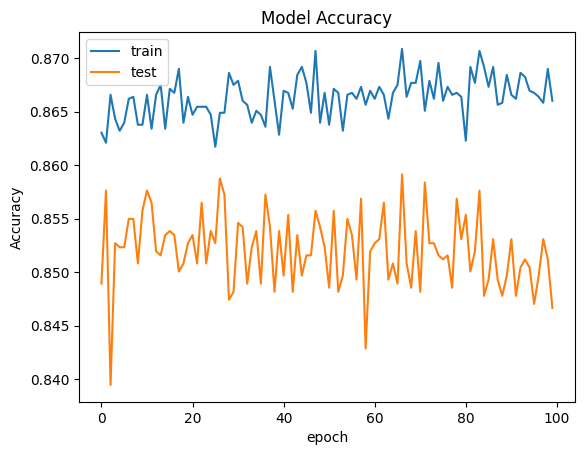

In [58]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

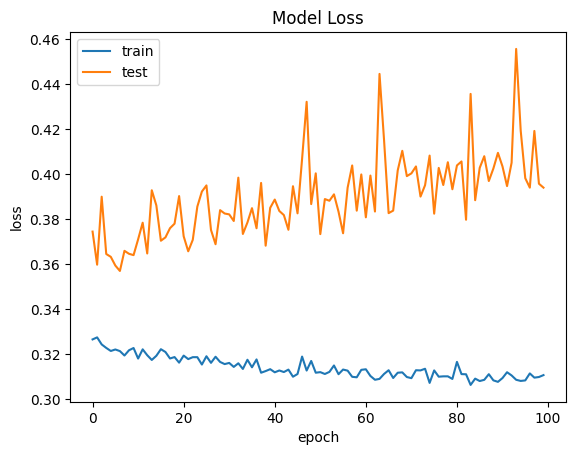

In [59]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# **PART 3 Makin predicitons and evaluating Model**

In [60]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [61]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1572,   23],
       [ 250,  155]])

In [62]:
#calculate accuracy 
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [63]:
score

0.8635

In [64]:
#get the weights
classifier.get_weights()

[array([[-1.0515045 , -0.40910536,  2.099723  , -0.3381779 , -0.03724833,
         -0.4889662 , -0.48756653,  2.0191913 , -0.8631191 ,  0.5913222 ,
         -0.44310126],
        [-3.8220713 , -2.8528645 ,  1.0814528 ,  0.8259519 , -3.1007657 ,
          4.3356714 , -0.25221506, -1.9836768 ,  0.35171112,  2.0419574 ,
         -4.585919  ],
        [ 1.4141277 ,  0.0826645 ,  0.27901927,  0.47982743, -1.9191474 ,
          0.89821804,  2.8561437 ,  2.001762  ,  0.78513646, -3.0073    ,
         -0.28313887],
        [ 3.0511796 ,  2.6823294 , -4.640541  ,  0.77887666, -3.3923855 ,
         -1.2656093 , -2.846713  , -3.5231133 , -4.43175   ,  1.5940573 ,
         -0.17801751],
        [-1.5897121 , -0.12698884, -2.3992012 ,  4.989032  , -3.8106508 ,
          1.6000549 , -1.4537141 , -0.64137334, -5.4179025 , -0.8576142 ,
          0.45899975],
        [ 1.1049889 ,  1.561554  , -0.2767747 ,  0.40524426,  2.0824032 ,
          0.7827234 ,  1.9172404 , -1.3398142 ,  0.3742556 , -1.0287814